### 풀이
- 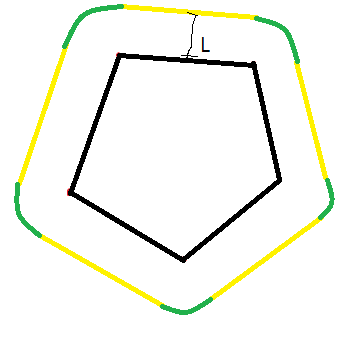
- 볼록 껍질을 구성했을 때 그 바깥에 거리가 L인 점들의 집합을 표현하면 위의 그림과 같다.
- 노란선은 볼록껍질에 있는 점들을 바깥쪽으로 L만큼 떨어뜨린 것이다.
- 그리고 노란선 사이를 가장 가까운 점에서 반지름이 L인 원을 그린것에 바깥쪽과 연결시킨다. (초록선)
- 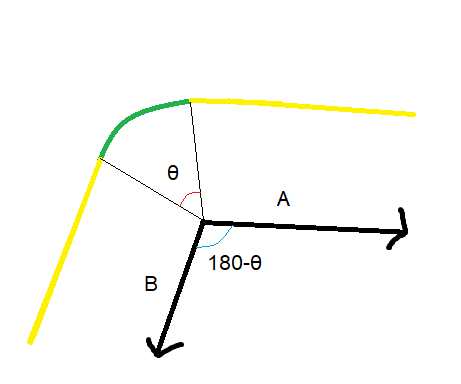
- 이때 초록선의 길이는 중심각이 $\theta$인 원의 반지름이 L일때의 길이이다.

### 구현
- 볼록껍질을 구하고, 구해진 볼록껍질 좌표를 통해 `각 변끼리의 길이` + `둥근 부분의 길이`를 구한다.
  - 각 변들을 순회한다고 했을때 이전에 있는 점을 `A`, 현재 점을 B, 다음 점을 C라고 할때 변의 길이는 한번만 더하면 되므로, AB의 길이를 구하는 것으로 정했다.
- 그리고 둥근 부분의 길이는, 반지름의 길이가 `L`이고 중심각이 $\theta$인 호의 길이인 `L * theta`를 구하면 된다.
  - 이때 중심각은 `BA와 BC의 내적`을 구하면 구할 수 있다.
  - 템플릿에 있는 내적함수는 이미 `BA`와 `BC`의 내적을 구하기 때문에 구하려 하는 내적과 같다.

In [ ]:
import io, os, math
input=io.BytesIO(os.read(0,os.fstat(0).st_size)).readline

cross = lambda a, b, c: (a[0] - b[0]) * (c[1] - b[1]) - (a[1] - b[1]) * (c[0] - b[0])
dot = lambda a, b, c: (a[0] - b[0]) * (c[0] - b[0]) + (a[1] - b[1]) * (c[1] - b[1])

def check(a, b, c):
  cr = cross(a, b, c)
  d = dot(a, b, c)
  return cr < 0 or cr == 0 and d <= 0

def ch(points):
  P = sorted(points)
  S = []
  for p in P + P[::-1]:
    while len(S) >= 2 and check(S[-2], S[-1], p):
      S.pop()
    S.append(p)
  S.pop()
  return S

N, L = map(int, input().split())
P = [tuple(map(int, input().split())) for _ in range(N)]
P = ch(P)
lenP = len(P)

ans = 0
for i, B in enumerate(P) :
  A, C = P[i-1], P[(i+1)%lenP]
  d1 = math.dist(A, B)
  d2 = math.dist(B, C)
  ans += d1

  inner = dot(A, B, C)
  th = math.acos(inner / (d1 * d2))
  th = math.pi - th
  ans += th * L

print(round(ans))